<a href="https://colab.research.google.com/github/jinay780/python/blob/master/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
true_df=pd.read_csv('True.csv')
fake_df=pd.read_csv('Fake.csv')

In [5]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true_df['check']='TRUE'
fake_df['check']='FALSE'

In [8]:
true_df.head()

,title,text,subject,date,check
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [9]:
fake_df.head()

,title,text,subject,date,check
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FALSE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FALSE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FALSE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FALSE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FALSE


In [10]:
print(true_df.shape)
print(fake_df.shape)

(21417, 5)
(23481, 5)


In [11]:
true_df.describe()

,title,text,subject,date,check
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",TRUE
freq,14,8,11272,182,21417


In [12]:
fake_df.describe()

,title,text,subject,date,check
count,23481,23481,23481,23481,23481
unique,17903,17455,6,1681,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",FALSE
freq,6,626,9050,46,23481


In [13]:
data=pd.concat([true_df,fake_df])
data.shape

(44898, 5)

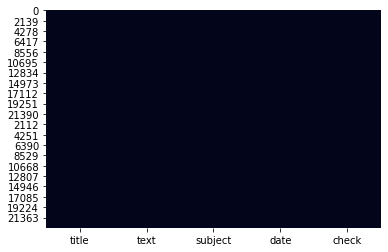

In [14]:
sns.heatmap(data.isnull(),cbar=False)

In [15]:
data.head()

,title,text,subject,date,check
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [16]:
data.sample(frac=1)

,title,text,subject,date,check
7439,Elizabeth Warren Brilliantly Responds To A**h...,Clearly forgetting that we re in the year 2016...,News,"March 18, 2016",FALSE
15917,THE ONE PARAGRAPH You Need To Read From The JF...,President Trump announced the release of the r...,Government News,"Oct 28, 2017",FALSE
18399,"EU parliament mauls UK's Brexit progress, May ...",STRASBOURG (Reuters) - The European Parliament...,worldnews,"October 3, 2017",TRUE
20786,NATO head says all states must comply with Nor...,TALLINN (Reuters) - NATO head Jens Stoltenberg...,worldnews,"September 7, 2017",TRUE
22087,‘Stop Arming Terrorists Bill’ Fails in US Cong...,21st Century Wire says What this latest result...,US_News,"June 21, 2017",FALSE
...,...,...,...,...,...
21092,"After political storm, Indonesia president fac...",JAKARTA (Reuters) - During the first months of...,worldnews,"September 4, 2017",TRUE
6353,Congress to start undoing Obama-era regulation...,WASHINGTON (Reuters) - Republican lawmakers wi...,politicsNews,"January 12, 2017",TRUE
20165,AWESOME LETTER TO OBAMA: Who is unfit to be pr...,Did anyone else think it was the ultimate iron...,left-news,"Aug 5, 2016",FALSE
11496,MADNESS IN BERKELEY: Anarchists Clash With Tru...,THE ANTIFA ANARCHISTS ARE IN ALL BLACK:WOMAN I...,politics,"Mar 4, 2017",FALSE


In [17]:
data['article'] = data['title']+""+data['text']+""+['subject']

In [18]:
df=data[['article','check']]

In [19]:
df['article']=df['article'].apply(lambda x:x.lower())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
import string
def punctuation(messy_str):
  clean=[char for char in messy_str if char not in string.punctuation]
  clean_str=''.join(clean)
  return clean_str

In [21]:
df['article'] = df['article'].apply(punctuation)
df['article'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    as us budget fight looms republicans flip thei...
1    us military to accept transgender recruits on ...
2    senior us republican senator let mr mueller do...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge much more...
Name: article, dtype: object

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['article'].apply(lambda x:[item for item in x if item not in stop ])

0        [ , u,  , b, u, g, e,  , f, g, h,  , l,  , r, ...
1        [u,  , l, r,  ,  , c, c, e, p,  , r, n, g, e, ...
2        [e, n, r,  , u,  , r, e, p, u, b, l, c, n,  , ...
3        [f, b,  , r, u,  , p, r, b, e,  , h, e, l, p, ...
4        [r, u, p,  , w, n,  , p, l,  , e, r, v, c, e, ...
                               ...                        
23476    [c, p, n,  , j, h, n,  , c, c, n,  , f, u, r, ...
23477    [j, u, c, e,  , h,  , e, l, e,  , e, l,  , p, ...
23478    [u, n, n, n,  , u,  , n,  , l, l, e,  , ‘, f, ...
23479    [h, w,  ,  , b, l, w,  , 7, 0, 0,  , l, l, n, ...
23480    [1, 0,  , u,  , n, v,  , l, r,  , h, e, l,  , ...
Name: article, Length: 44898, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer().fit(df['article'])
article=bow.transform(df['article'])

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer().fit(article)
news=tfidf.transform(article)

In [26]:
X=news
y=df['check']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
prediction=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n       FALSE       0.99      0.99      0.99      7088\n        TRUE       0.99      0.99      0.99      6382\n\n    accuracy                           0.99     13470\n   macro avg       0.99      0.99      0.99     13470\nweighted avg       0.99      0.99      0.99     13470\n'

In [30]:
accuracy_score(y_test,prediction)

0.9875278396436525

In [31]:
from sklearn.naive_bayes import MultinomialNB
mod=MultinomialNB()
mod.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
y_pred=mod.predict(X_test)

In [33]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       FALSE       0.94      0.96      0.95      7088\n        TRUE       0.95      0.93      0.94      6382\n\n    accuracy                           0.94     13470\n   macro avg       0.94      0.94      0.94     13470\nweighted avg       0.94      0.94      0.94     13470\n'

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6770,  318],
       [ 466, 5916]])

In [34]:
accuracy_score(y_test,y_pred)

0.941796585003712